   Updating registry at `C:\Users\alves\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `C:\Users\alves\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\alves\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\alves\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\alves\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\alves\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\alves\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\alves\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\alves\.julia\environments\v1.4\Manifest.toml`
 [no changes]


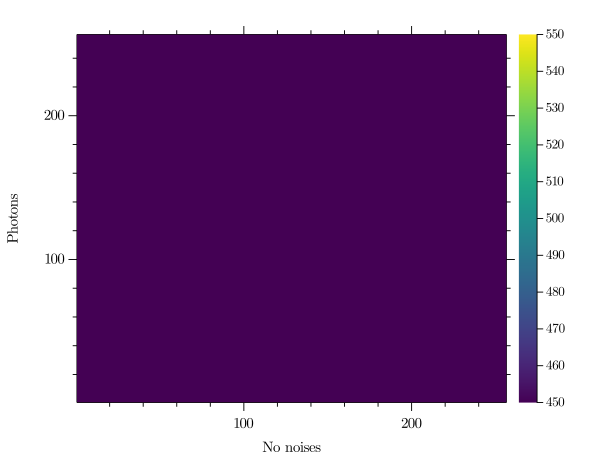

In [1]:
using Pkg; Pkg.add("GR"); Pkg.add("Distributions"); Pkg.add("FFTW"); Pkg.add("Random")
using GR; using Distributions, FFTW , Random
num_photons = 500
num_pixels = 256
shotNoise = num_photons * ones(Float64, num_pixels, num_pixels)
xlabel("No noises")
ylabel("Photons")
heatmap(shotNoise)

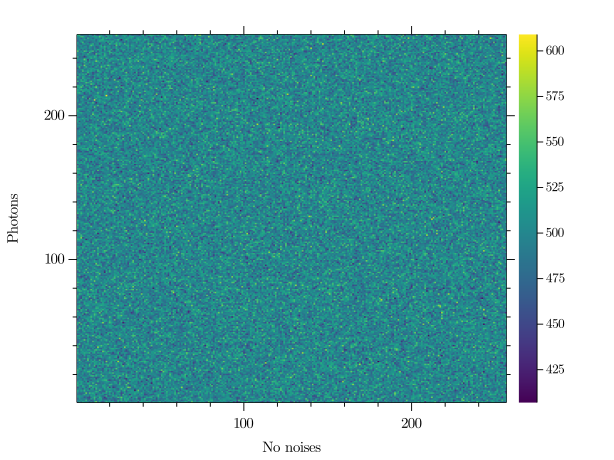

In [2]:
seed       = 42

x = Poisson(num_photons)

for i in 1:num_pixels
    for j in 1:num_pixels
        shotNoise[i,j] = rand(x)
    end
end
heatmap(shotNoise)


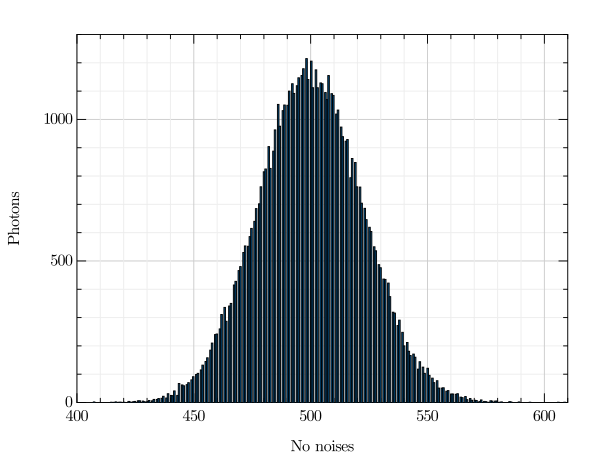

In [3]:
histogram(shotNoise; nbins = 650-350)

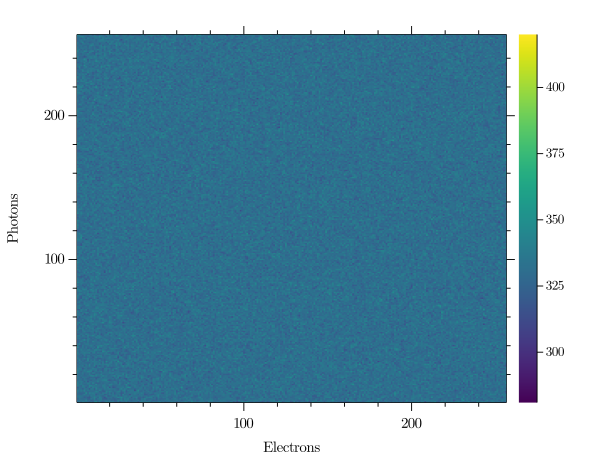

In [4]:
quantum_efficiency = 0.69
# Round the result to ensure that we have a discrete number of electrons

electrons = ones(Float64,num_pixels,num_pixels)

for i in 1:num_pixels
    for j in 1:num_pixels
        electrons[i,j] = round(quantum_efficiency * shotNoise[i,j], digits=0)
    end
end

xlabel("Electrons")
heatmap(electrons, clim=[200.,600.])

Invalid keyword: boundaries


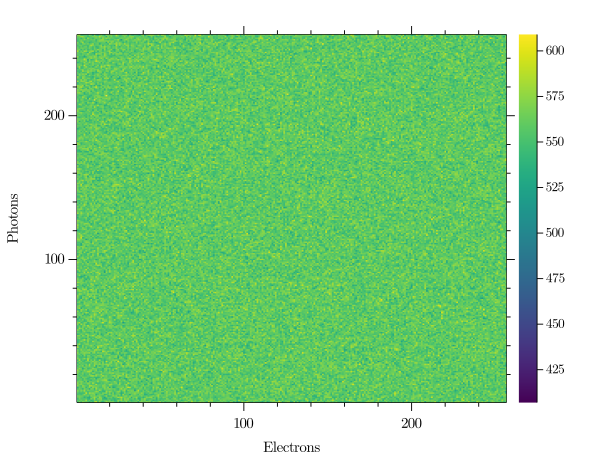

In [5]:
heatmap(shotNoise, clim=[200.,600.],boundaries = [200.,600.])

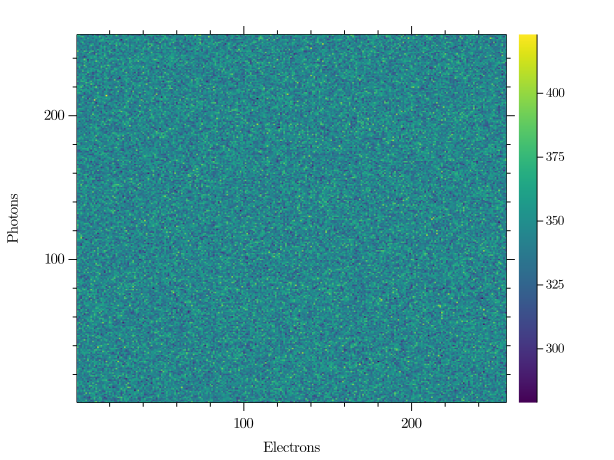

In [6]:
darkNoise = 2.29

Random.seed!(42) # Setting the seed
d = Normal(0, darkNoise)

electrons_out = ones(Float64,num_pixels,num_pixels)

for i in 1:num_pixels
    for j in 1:num_pixels
        n = rand(d)
        electrons_out[i,j] = round(n + electrons[i,j], digits=0)
    end
end


heatmap(electrons_out)

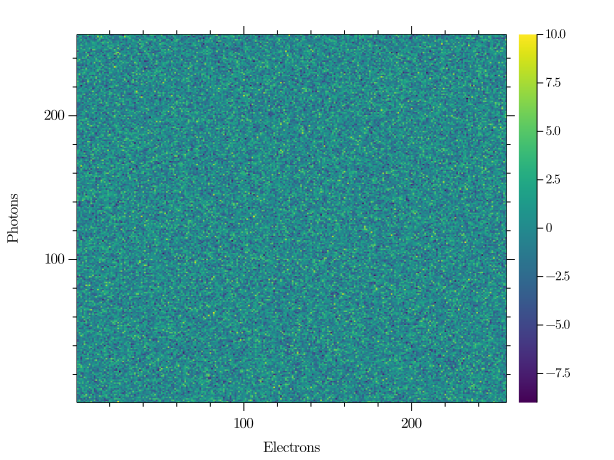

In [7]:
heatmap(electrons - electrons_out)

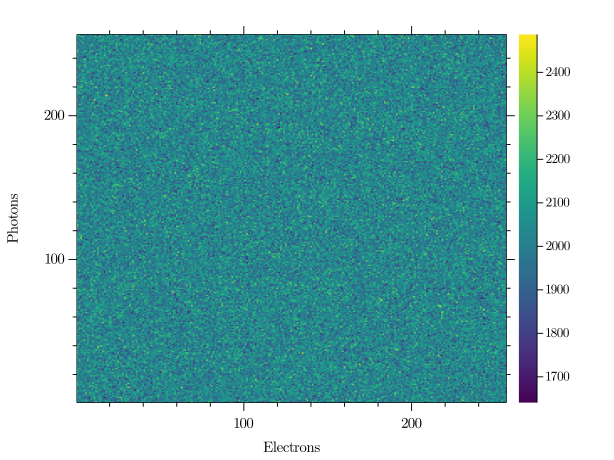

In [9]:
sensitivity = 5.88 # ADU/e-
bitdepth    = 12
max_adu     = Int(2^bitdepth - 1)

adu = ones(Float64,num_pixels,num_pixels)

for i in 1:num_pixels
    for j in 1:num_pixels
        adu[i,j]         = Int(round(electrons_out[i,j] * sensitivity, digits=0))
        if adu[i,j] > max_adu
            adu[i,j] = max_adu
        end
    end
end

heatmap(adu)


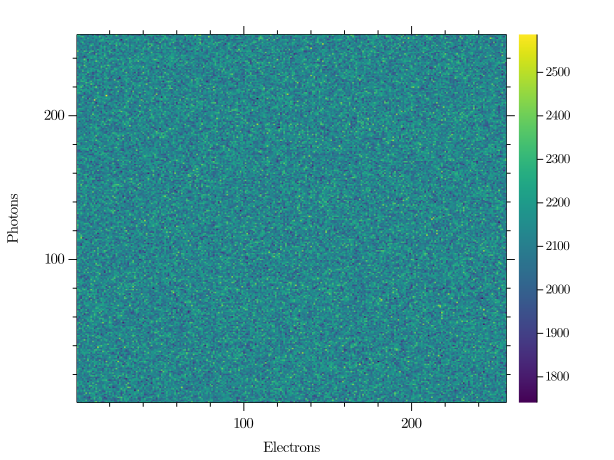

In [11]:
baseline  = 100 # ADU

for i in 1:num_pixels
    for j in 1:num_pixels
        adu[i,j]         = adu[i,j] + baseline
        if adu[i,j] > max_adu
            adu[i,j] = max_adu
        end
    end
end

heatmap(adu)